In [1]:
from theano.sandbox import cuda
cuda.use('gpu2')

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
WARNING (theano.sandbox.cuda): Ignoring call to use(2), GPU number 0 is already in use.


In [2]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

Using Theano backend.


## Setup

In [3]:
batch_size=64

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_test = np.expand_dims(X_test,1)
X_train = np.expand_dims(X_train,1)

In [6]:
X_train.shape

(60000, 1, 28, 28)

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
y_train = onehot(y_train)
y_test = onehot(y_test)

In [9]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [10]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

In [11]:
def norm_input(x): return (x-mean_px)/std_px

## Linear model

In [12]:
def get_lin_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Flatten(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
lm = get_lin_model()

In [12]:
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [15]:
lm.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 12s - loss: 0.4314 - acc: 0.8728 - val_loss: 0.2987 - val_acc: 0.9171


In [16]:
lm.optimizer.lr=0.1

In [17]:
lm.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 12s - loss: 0.2994 - acc: 0.9159 - val_loss: 0.2867 - val_acc: 0.9192


In [18]:
lm.optimizer.lr=0.01

In [19]:
lm.fit_generator(batches, batches.N, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/4
60000/60000 [==============================] - 12s - loss: 0.2857 - acc: 0.9203 - val_loss: 0.2905 - val_acc: 0.9204
Epoch 2/4
60000/60000 [==============================] - 12s - loss: 0.2784 - acc: 0.9218 - val_loss: 0.2858 - val_acc: 0.9182
Epoch 3/4
60000/60000 [==============================] - 12s - loss: 0.2737 - acc: 0.9233 - val_loss: 0.2809 - val_acc: 0.9210
Epoch 4/4
60000/60000 [==============================] - 12s - loss: 0.2694 - acc: 0.9256 - val_loss: 0.2887 - val_acc: 0.9223


## Single dense layer

In [20]:
def get_fc_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
fc = get_fc_model()

In [22]:
fc.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 12s - loss: 0.1958 - acc: 0.9407 - val_loss: 0.1101 - val_acc: 0.9677


In [23]:
fc.optimizer.lr=0.1

In [24]:
fc.fit_generator(batches, batches.N, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/4
60000/60000 [==============================] - 13s - loss: 0.0814 - acc: 0.9757 - val_loss: 0.0819 - val_acc: 0.9747
Epoch 2/4
60000/60000 [==============================] - 12s - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0787 - val_acc: 0.9758
Epoch 3/4
60000/60000 [==============================] - 12s - loss: 0.0400 - acc: 0.9867 - val_loss: 0.0763 - val_acc: 0.9768
Epoch 4/4
60000/60000 [==============================] - 13s - loss: 0.0329 - acc: 0.9889 - val_loss: 0.0865 - val_acc: 0.9740


In [25]:
fc.optimizer.lr=0.01

In [26]:
fc.fit_generator(batches, batches.N, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/4
60000/60000 [==============================] - 12s - loss: 0.0267 - acc: 0.9913 - val_loss: 0.0725 - val_acc: 0.9796
Epoch 2/4
60000/60000 [==============================] - 12s - loss: 0.0239 - acc: 0.9920 - val_loss: 0.0775 - val_acc: 0.9813
Epoch 3/4
60000/60000 [==============================] - 12s - loss: 0.0209 - acc: 0.9927 - val_loss: 0.0800 - val_acc: 0.9795
Epoch 4/4
60000/60000 [==============================] - 12s - loss: 0.0199 - acc: 0.9932 - val_loss: 0.0814 - val_acc: 0.9820


## Basic 'VGG-style' CNN

In [27]:
def get_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,3,3, activation='relu'),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
model = get_model()

In [29]:
model.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 20s - loss: 0.1082 - acc: 0.9653 - val_loss: 0.0332 - val_acc: 0.9886


In [30]:
model.optimizer.lr=0.1

In [31]:
model.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 20s - loss: 0.0332 - acc: 0.9896 - val_loss: 0.0275 - val_acc: 0.9906


In [32]:
model.optimizer.lr=0.01

In [33]:
model.fit_generator(batches, batches.N, nb_epoch=8, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/8
60000/60000 [==============================] - 20s - loss: 0.0248 - acc: 0.9920 - val_loss: 0.0242 - val_acc: 0.9923
Epoch 2/8
60000/60000 [==============================] - 21s - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0235 - val_acc: 0.9930
Epoch 3/8
60000/60000 [==============================] - 20s - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0284 - val_acc: 0.9920
Epoch 4/8
60000/60000 [==============================] - 20s - loss: 0.0138 - acc: 0.9955 - val_loss: 0.0282 - val_acc: 0.9917
Epoch 5/8
60000/60000 [==============================] - 20s - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0331 - val_acc: 0.9927
Epoch 6/8
60000/60000 [==============================] - 20s - loss: 0.0097 - acc: 0.9966 - val_loss: 0.0341 - val_acc: 0.9925
Epoch 7/8
60000/60000 [==============================] - 20s - loss: 0.0090 - acc: 0.9973 - val_loss: 0.0309 - val_acc: 0.9921
Epoch 8/8
60000/60000 [==============================] - 20s - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0309 - 

## Data augmentation

In [34]:
model = get_model()

In [35]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [36]:
model.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 21s - loss: 0.2004 - acc: 0.9363 - val_loss: 0.0640 - val_acc: 0.9794


In [37]:
model.optimizer.lr=0.1

In [38]:
model.fit_generator(batches, batches.N, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/4
60000/60000 [==============================] - 21s - loss: 0.0694 - acc: 0.9781 - val_loss: 0.0553 - val_acc: 0.9819
Epoch 2/4
60000/60000 [==============================] - 21s - loss: 0.0561 - acc: 0.9819 - val_loss: 0.0502 - val_acc: 0.9851
Epoch 3/4
60000/60000 [==============================] - 21s - loss: 0.0475 - acc: 0.9860 - val_loss: 0.0456 - val_acc: 0.9859
Epoch 4/4
60000/60000 [==============================] - 21s - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0399 - val_acc: 0.9881


In [39]:
model.optimizer.lr=0.01

In [40]:
model.fit_generator(batches, batches.N, nb_epoch=8, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/8
60000/60000 [==============================] - 22s - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0354 - val_acc: 0.9885
Epoch 2/8
60000/60000 [==============================] - 21s - loss: 0.0362 - acc: 0.9890 - val_loss: 0.0452 - val_acc: 0.9859
Epoch 3/8
60000/60000 [==============================] - 21s - loss: 0.0345 - acc: 0.9895 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 4/8
60000/60000 [==============================] - 21s - loss: 0.0336 - acc: 0.9893 - val_loss: 0.0333 - val_acc: 0.9893
Epoch 5/8
60000/60000 [==============================] - 21s - loss: 0.0306 - acc: 0.9906 - val_loss: 0.0330 - val_acc: 0.9895
Epoch 6/8
60000/60000 [==============================] - 21s - loss: 0.0289 - acc: 0.9911 - val_loss: 0.0349 - val_acc: 0.9907
Epoch 7/8
60000/60000 [==============================] - 21s - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0507 - val_acc: 0.9850
Epoch 8/8
60000/60000 [==============================] - 21s - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0341 - 

In [41]:
model.optimizer.lr=0.001

In [42]:
model.fit_generator(batches, batches.N, nb_epoch=14, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/14
60000/60000 [==============================] - 21s - loss: 0.0269 - acc: 0.9918 - val_loss: 0.0286 - val_acc: 0.9915
Epoch 2/14
60000/60000 [==============================] - 21s - loss: 0.0264 - acc: 0.9922 - val_loss: 0.0264 - val_acc: 0.9918
Epoch 3/14
60000/60000 [==============================] - 21s - loss: 0.0247 - acc: 0.9918 - val_loss: 0.0345 - val_acc: 0.9900
Epoch 4/14
60000/60000 [==============================] - 21s - loss: 0.0237 - acc: 0.9924 - val_loss: 0.0303 - val_acc: 0.9907
Epoch 5/14
60000/60000 [==============================] - 21s - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0346 - val_acc: 0.9892
Epoch 6/14
60000/60000 [==============================] - 21s - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0359 - val_acc: 0.9899
Epoch 7/14
60000/60000 [==============================] - 21s - loss: 0.0221 - acc: 0.9932 - val_loss: 0.0236 - val_acc: 0.9923
Epoch 8/14
60000/60000 [==============================] - 21s - loss: 0.0208 - acc: 0.9931 - val_loss: 0

In [43]:
model.optimizer.lr=0.0001

In [44]:
model.fit_generator(batches, batches.N, nb_epoch=10, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/10
60000/60000 [==============================] - 21s - loss: 0.0197 - acc: 0.9935 - val_loss: 0.0282 - val_acc: 0.9916
Epoch 2/10
60000/60000 [==============================] - 21s - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 3/10
60000/60000 [==============================] - 21s - loss: 0.0185 - acc: 0.9945 - val_loss: 0.0320 - val_acc: 0.9909
Epoch 4/10
60000/60000 [==============================] - 21s - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0388 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 21s - loss: 0.0181 - acc: 0.9945 - val_loss: 0.0255 - val_acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 21s - loss: 0.0191 - acc: 0.9941 - val_loss: 0.0316 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 21s - loss: 0.0170 - acc: 0.9944 - val_loss: 0.0339 - val_acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 21s - loss: 0.0198 - acc: 0.9938 - val_loss: 0

## Batchnorm + data augmentation

In [45]:
def get_model_bn():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [46]:
model = get_model_bn()

In [47]:
model.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 48s - loss: 0.1633 - acc: 0.9495 - val_loss: 0.0656 - val_acc: 0.9789


In [48]:
model.optimizer.lr=0.1

In [49]:
model.fit_generator(batches, batches.N, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/4
60000/60000 [==============================] - 47s - loss: 0.0722 - acc: 0.9775 - val_loss: 0.0568 - val_acc: 0.9826
Epoch 2/4
60000/60000 [==============================] - 47s - loss: 0.0584 - acc: 0.9813 - val_loss: 0.0448 - val_acc: 0.9859
Epoch 3/4
60000/60000 [==============================] - 48s - loss: 0.0525 - acc: 0.9829 - val_loss: 0.0407 - val_acc: 0.9883
Epoch 4/4
60000/60000 [==============================] - 48s - loss: 0.0476 - acc: 0.9854 - val_loss: 0.0500 - val_acc: 0.9825


In [50]:
model.optimizer.lr=0.01

In [51]:
model.fit_generator(batches, batches.N, nb_epoch=12, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/12
60000/60000 [==============================] - 48s - loss: 0.0413 - acc: 0.9870 - val_loss: 0.0425 - val_acc: 0.9870
Epoch 2/12
60000/60000 [==============================] - 48s - loss: 0.0404 - acc: 0.9873 - val_loss: 0.0366 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 47s - loss: 0.0384 - acc: 0.9878 - val_loss: 0.0428 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 48s - loss: 0.0381 - acc: 0.9881 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 48s - loss: 0.0320 - acc: 0.9894 - val_loss: 0.0319 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 47s - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0279 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 47s - loss: 0.0310 - acc: 0.9908 - val_loss: 0.0245 - val_acc: 0.9918
Epoch 8/12
60000/60000 [==============================] - 47s - loss: 0.0310 - acc: 0.9904 - val_loss: 0

In [60]:
model.optimizer.lr=0.001

In [61]:
model.fit_generator(batches, batches.N, nb_epoch=12, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/12
60000/60000 [==============================] - 48s - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0314 - val_acc: 0.9903
Epoch 2/12
60000/60000 [==============================] - 48s - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0202 - val_acc: 0.9926
Epoch 3/12
60000/60000 [==============================] - 49s - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0252 - val_acc: 0.9921
Epoch 4/12
60000/60000 [==============================] - 47s - loss: 0.0226 - acc: 0.9930 - val_loss: 0.0229 - val_acc: 0.9932
Epoch 5/12
60000/60000 [==============================] - 48s - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0247 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 48s - loss: 0.0228 - acc: 0.9926 - val_loss: 0.0183 - val_acc: 0.9941
Epoch 7/12
60000/60000 [==============================] - 48s - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0210 - val_acc: 0.9933
Epoch 8/12
60000/60000 [==============================] - 47s - loss: 0.0204 - acc: 0.9937 - val_loss: 0

## Batchnorm + dropout + data augmentation

In [15]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [63]:
model = get_model_bn_do()

In [64]:
model.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 47s - loss: 0.2234 - acc: 0.9322 - val_loss: 0.0650 - val_acc: 0.9798


In [65]:
model.optimizer.lr=0.1

In [66]:
model.fit_generator(batches, batches.N, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/4
60000/60000 [==============================] - 48s - loss: 0.0918 - acc: 0.9710 - val_loss: 0.0473 - val_acc: 0.9861
Epoch 2/4
60000/60000 [==============================] - 47s - loss: 0.0760 - acc: 0.9760 - val_loss: 0.0438 - val_acc: 0.9853
Epoch 3/4
60000/60000 [==============================] - 48s - loss: 0.0689 - acc: 0.9790 - val_loss: 0.0408 - val_acc: 0.9860
Epoch 4/4
60000/60000 [==============================] - 47s - loss: 0.0642 - acc: 0.9807 - val_loss: 0.0311 - val_acc: 0.9909


In [67]:
model.optimizer.lr=0.01

In [68]:
model.fit_generator(batches, batches.N, nb_epoch=12, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/12
60000/60000 [==============================] - 48s - loss: 0.0568 - acc: 0.9823 - val_loss: 0.0401 - val_acc: 0.9872
Epoch 2/12
60000/60000 [==============================] - 48s - loss: 0.0523 - acc: 0.9838 - val_loss: 0.0345 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 47s - loss: 0.0516 - acc: 0.9845 - val_loss: 0.0383 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 47s - loss: 0.0476 - acc: 0.9851 - val_loss: 0.0306 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 47s - loss: 0.0459 - acc: 0.9863 - val_loss: 0.0236 - val_acc: 0.9926
Epoch 6/12
60000/60000 [==============================] - 47s - loss: 0.0409 - acc: 0.9876 - val_loss: 0.0300 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 47s - loss: 0.0448 - acc: 0.9863 - val_loss: 0.0329 - val_acc: 0.9906
Epoch 8/12
60000/60000 [==============================] - 46s - loss: 0.0405 - acc: 0.9873 - val_loss: 0

In [71]:
model.optimizer.lr=0.001

In [72]:
model.fit_generator(batches, batches.N, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 47s - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0227 - val_acc: 0.9929


## Ensembling

In [16]:
def fit_model():
    model = get_model_bn_do()
    model.fit_generator(batches, batches.N, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.1
    model.fit_generator(batches, batches.N, nb_epoch=4, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.01
    model.fit_generator(batches, batches.N, nb_epoch=12, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.001
    model.fit_generator(batches, batches.N, nb_epoch=18, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    return model

In [17]:
models = [fit_model() for i in range(6)]

In [18]:
path = "data/mnist/"
model_path = path + 'models/'

In [20]:
for i,m in enumerate(models):
    m.save_weights(model_path+'cnn-mnist23-'+str(i)+'.pkl')

In [21]:
evals = np.array([m.evaluate(X_test, y_test, batch_size=256) for m in models])

 9984/10000 [============================>.] - ETA: 0s

In [22]:
evals.mean(axis=0)

array([ 0.0314,  0.9943])

In [23]:
all_preds = np.stack([m.predict(X_test, batch_size=256) for m in models])

In [24]:
all_preds.shape

(6, 10000, 10)

In [25]:
avg_preds = all_preds.mean(axis=0)

In [26]:
keras.metrics.categorical_accuracy(y_test, avg_preds).eval()

array(0.9965000152587891, dtype=float32)

In [80]:
def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

plt.gray()
plt.close()

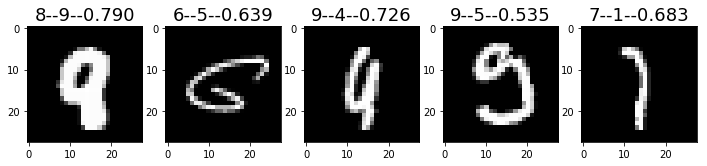

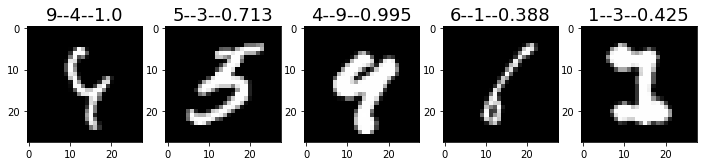

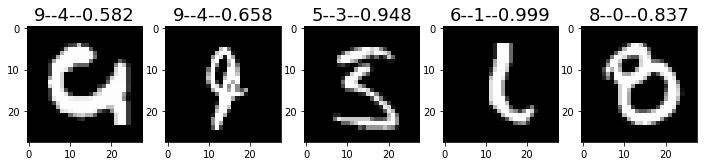

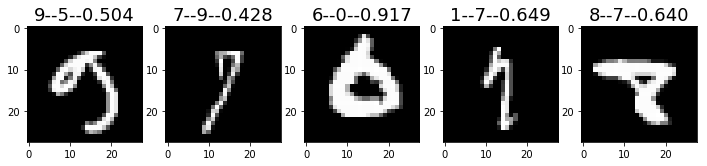

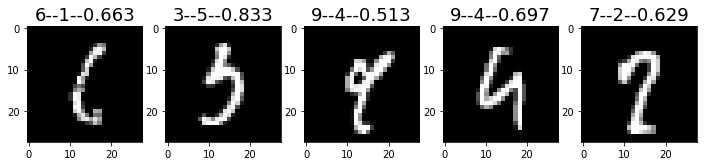

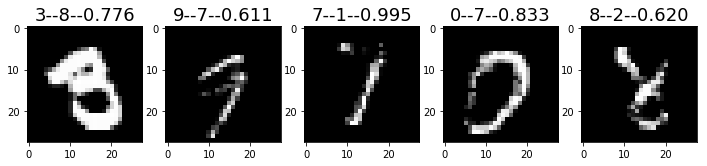

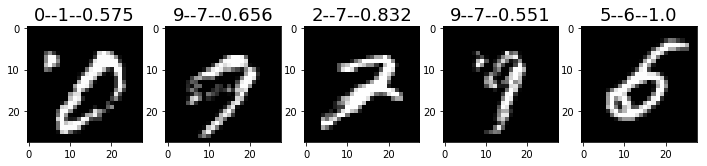

In [162]:
### Misclassifications: Truth--Predicted Label--Predicted Probability

imgs = X_test[np.where(y_test.argmax(axis=1) != avg_preds.argmax(axis=1))[0]]
correct_labels = y_test[np.where(y_test.argmax(axis=1) != avg_preds.argmax(axis=1))[0]].argmax(axis=1)
pred_labels = avg_preds.argmax(axis=1)[np.where(y_test.argmax(axis=1) != avg_preds.argmax(axis=1))[0]]
probs = avg_preds.max(axis=1)[np.where(y_test.argmax(axis=1) != avg_preds.argmax(axis=1))[0]]

for start_index, end_index in zip(range(0, len(imgs), 5), range(5, len(imgs) + 5, 5)):
    labels_with_probs = ['--'.join(tup) for tup in zip(
            correct_labels[start_index:end_index].astype('str'), 
            pred_labels[start_index:end_index].astype('str'),
            probs[start_index:end_index].round(3).astype('|S5'))
                        ]
    plots(imgs[start_index:end_index].reshape(-1, 28, 28), titles=labels_with_probs)